In [20]:
import matplotlib.pyplot as plt
from basic_stimuli import generate_stimuli
import torch
from modeling.models.bethge import BethgeModel
import numpy as np
from tqdm import tqdm
from analysis.Stat_utils import get_site_corr
from skimage.draw import disk
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:

sites = ['m1s1', 'm1s2', 'm1s3', 'm2s1', 'm2s2', 'm3s1']
sizes = [15,25,35,50]
site_corr = []
site_mse = []
for site in sites:
    #val_x = np.load('../data/Processed_Tang_data/all_sites_data_prepared/pics_data/val_img_' + site + '.npy')
    val_y = np.load('../data/Processed_Tang_data/all_sites_data_prepared/New_response_data/valRsp_' + site + '.npy')
    channels = 256
    num_layers = 9
    input_size = 50
    output_size = val_y.shape[1]
    first_k = 9
    later_k = 3
    pool_size = 2
    factorized = True
    num_maps = 1
    all_avg_corr = []
    all_avg_mse = []
    for size in sizes:

        net = BethgeModel(channels=channels, num_layers=num_layers, input_size=size,
                      output_size=output_size, first_k=first_k, later_k=later_k,
                      input_channels=1, pool_size=pool_size, factorized=True,
                      num_maps=num_maps).cuda()
        net.to(device)

        if size < 50:
            net.load_state_dict(torch.load('../saved_models/cropped_models/'+site+'_size_'+str(size)+'_model'))
            val_x = np.load(f'../data/cropped_tang_data/c_val_img_site_{site}_size_{size}.npy')
        else:
            net.load_state_dict(torch.load('../saved_models/new_learned_models/' + site + '_9_model_version_0'))
            val_x = np.load('../data/Processed_Tang_data/all_sites_data_prepared/pics_data/val_img_' + site + '.npy')
        corr, mse = get_site_corr(net,device,site, val_x=np.reshape(val_x, (val_x.shape[0],1,size, size)), val_y=val_y)
        all_avg_corr.append(np.mean(corr))
        all_avg_mse.append(np.mean(mse))
    all_avg_mse = np.stack(all_avg_mse)
    all_avg_corr = np.stack(all_avg_corr)
    site_mse.append(all_avg_mse)
    site_corr.append(all_avg_corr)
site_corr = np.stack(site_corr)
#site_mse = np.stack(site_mse)

100%|██████████| 324/324 [00:00<00:00, 1585.73it/s]


In [2]:
def crop(img, size):
    img = np.reshape(img, (50,50))
    newimg = np.full((50, 50), 0.5)
    edge_size = (50 - size) // 2
    newimg[edge_size:edge_size + size, edge_size:edge_size + size] = img[edge_size:edge_size + size,
                                                                     edge_size:edge_size + size]
    return newimg

In [27]:

sites = ['m1s1', 'm1s2', 'm1s3', 'm2s1', 'm2s2', 'm3s1']
sizes = np.arange(1,26,1)
site_corr_circle = []
site_mse = []
for site in sites:
    #val_x = np.load('../data/Processed_Tang_data/all_sites_data_prepared/pics_data/val_img_' + site + '.npy')
    val_y = np.load('../data/Processed_Tang_data/all_sites_data_prepared/New_response_data/valRsp_' + site + '.npy')
    channels = 256
    num_layers = 9
    input_size = 50
    output_size = val_y.shape[1]
    first_k = 9
    later_k = 3
    pool_size = 2
    factorized = True
    num_maps = 1
    all_avg_corr = []
    for size in sizes:

        net = BethgeModel(channels=channels, num_layers=num_layers, input_size=50,
                      output_size=output_size, first_k=first_k, later_k=later_k,
                      input_channels=1, pool_size=pool_size, factorized=True,
                      num_maps=num_maps).cuda()
        net.to(device)


        net.load_state_dict(torch.load('../saved_models/new_learned_models/' + site + '_9_model_version_0'))
        val_x = np.load('../data/Processed_Tang_data/all_sites_data_prepared/pics_data/val_img_' + site + '.npy')
        rr, cc = disk((25, 25), size, shape=val_x[0].shape)

        new_val_x = []
        for x in val_x:
            new_x = gray_back = np.full((50,50,1),0.5)
            new_x[rr,cc,:] = x[rr,cc,:]
            new_val_x.append(new_x)
        val_x = np.array(new_val_x)
        corr, mse = get_site_corr(net,device,site, val_x=np.reshape(val_x, (val_x.shape[0],1,50, 50)), val_y=val_y)
        all_avg_corr.append((corr))
    all_avg_corr = np.stack(all_avg_corr)
    site_corr_circle.append(all_avg_corr)


100%|██████████| 324/324 [00:00<00:00, 1554.81it/s]


In [11]:
sites = ['m1s1', 'm1s2', 'm1s3', 'm2s1', 'm2s2', 'm3s1']
sizes = np.arange(5,51,1)
site_corr = []
site_mse = []
for site in sites:
    #val_x = np.load('../data/Processed_Tang_data/all_sites_data_prepared/pics_data/val_img_' + site + '.npy')
    val_y = np.load('../data/Processed_Tang_data/all_sites_data_prepared/New_response_data/valRsp_' + site + '.npy')
    channels = 256
    num_layers = 9
    input_size = 50
    output_size = val_y.shape[1]
    first_k = 9
    later_k = 3
    pool_size = 2
    factorized = True
    num_maps = 1
    all_avg_corr = []
    all_avg_mse = []
    for size in sizes:

        net = BethgeModel(channels=channels, num_layers=num_layers, input_size=50,
                      output_size=output_size, first_k=first_k, later_k=later_k,
                      input_channels=1, pool_size=pool_size, factorized=True,
                      num_maps=num_maps).cuda()
        net.to(device)


        net.load_state_dict(torch.load('../saved_models/new_learned_models/' + site + '_9_model_version_0'))
        val_x = np.load('../data/Processed_Tang_data/all_sites_data_prepared/pics_data/val_img_' + site + '.npy')
        val_x = np.array([crop(x, size) for x in val_x])
        corr, mse = get_site_corr(net,device,site, val_x=np.reshape(val_x, (val_x.shape[0],1,50, 50)), val_y=val_y)
        all_avg_corr.append((corr))
        all_avg_mse.append((mse))
    all_avg_mse = np.stack(all_avg_mse)
    all_avg_corr = np.stack(all_avg_corr)
    site_mse.append(all_avg_mse)
    site_corr.append(all_avg_corr)
#site_corr = np.stack(site_corr)
#site_mse = np.stack(site_mse)

100%|██████████| 324/324 [00:00<00:00, 1489.37it/s]


In [28]:
kept_index = np.load('../data/new_kept_idx.npy', allow_pickle=True)
kept_corr = []
for i, c in enumerate(site_corr_circle):
    site_index = kept_index[i]
    kept_corr.append(c[:,site_index])
all_corr = np.concatenate(kept_corr,axis=1)

In [46]:
all_corr_all_neuron = np.concatenate(site_corr_circle,axis=1)
step_error_all_neuron = np.std(all_corr_all_neuron,axis=1)

In [30]:
step_error = np.std(all_corr,axis=1)

In [ ]:
for i, site in enumerate(sites):
    plt.figure()
    plt.plot(sizes,site_corr[i])
    #plt.bar(['15','25','35','50'], site_mse[i])
    plt.savefig(f'corr_change_cropped_size_{site}')

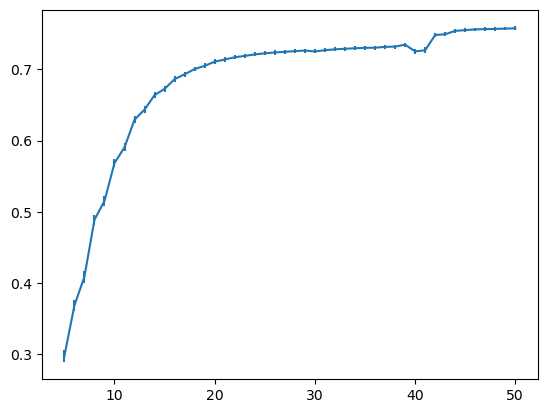

In [18]:
plt.figure()
#plt.plot(sizes,np.average(all_corr, axis=1))

plt.errorbar(sizes, np.average(all_corr, axis=1), yerr=step_error/np.sqrt(all_corr.shape[1]))
#plt.bar(['15','25','35','50'], site_mse[i])
plt.savefig(f'corr_change_cropped_size_error_selective')

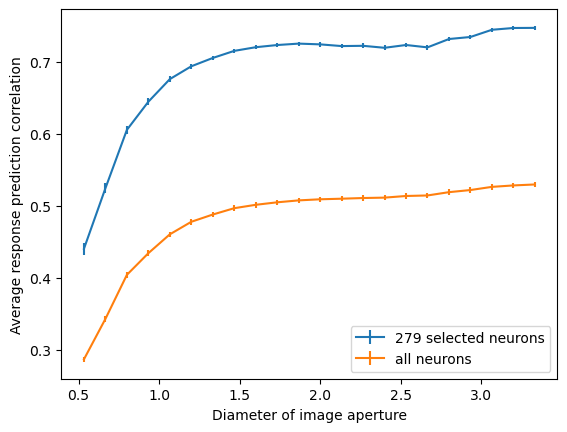

In [79]:
plt.figure()
#plt.plot(sizes,np.average(all_corr, axis=1))

plt.errorbar((sizes*2/15)[3:], np.average(all_corr, axis=1)[3:], yerr=step_error[3:]/np.sqrt(all_corr.shape[1]), label= '279 selected neurons')

plt.errorbar((sizes*2/15)[3:], np.average(all_corr_all_neuron, axis=1)[3:], yerr=step_error_all_neuron[3:]/np.sqrt(all_corr_all_neuron.shape[1]), label='all neurons')

plt.xlabel('Diameter of image aperture')
plt.ylabel('Average response prediction correlation')
plt.legend()
#plt.plot(np.average(all_corr, axis=1)[5:])
#plt.bar(['15','25','35','50'], site_mse[i])
plt.savefig(f'corr_change_cropped_size_error_selective')

In [72]:
from scipy import stats
point_a = all_corr[6-1]
point_b = all_corr[11-1]
point_c = all_corr[25-1]
stats.ttest_rel(point_a, point_b, alternative='less')


Ttest_relResult(statistic=-23.72990686721006, pvalue=4.292019696204112e-69)

In [73]:
print((np.average(point_b)-np.average(point_a))/np.average(point_a))

0.18118518699982153


In [67]:
stats.ttest_rel(point_b, point_c, alternative='less')

Ttest_relResult(statistic=-14.771552587124575, pvalue=3.810935738621643e-37)

In [74]:
print((np.average(point_c)-np.average(point_b))/np.average(point_b))

0.04468459735880527


In [76]:
from scipy import stats

point_a = all_corr_all_neuron[6 - 1]
point_b = all_corr_all_neuron[11 - 1]
point_c = all_corr_all_neuron[25 - 1]
print(stats.ttest_rel(point_a, point_b, alternative='less'))

print((np.average(point_b) - np.average(point_a)) / np.average(point_a))
print(stats.ttest_rel(point_b, point_c, alternative='less'))
print((np.average(point_c) - np.average(point_b)) / np.average(point_b))

Ttest_relResult(statistic=-53.62378296765237, pvalue=0.0)
0.22910028699302137
Ttest_relResult(statistic=-29.612615699160507, pvalue=7.338642138770301e-156)
0.06635788717170282


In [70]:
print(all_corr[11-1].shape)

(279,)


In [61]:
print(0.75*15/2)
print(1.5*15/2)
print(3.3*15/2)

5.625
11.25
24.75
